In [3]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.graph_objects as go

In [4]:
table1 = pd.read_csv("data/test_users.csv")
table1

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,cv0na2lf5a,2014-09-30,20140930235232,NaN,-unknown-,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE
62092,zp8xfonng8,2014-09-30,20140930235306,NaN,-unknown-,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-
62093,fa6260ziny,2014-09-30,20140930235408,NaN,-unknown-,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox
62094,87k0fy4ugm,2014-09-30,20140930235430,NaN,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari


In [5]:
sessions = pd.read_csv("data/sessions.csv")
sessions

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
...,...,...,...,...,...,...
10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10567734,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10567735,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0


In [6]:
import pyspark
from pyspark import SparkContext
sc =SparkContext()

from pyspark.sql import Row
from pyspark.sql import SQLContext

In [7]:
sqlContext = SQLContext(sc)

In [8]:
from functools import reduce  # For Python 3.x
from pyspark.sql import DataFrame

def unionAll(*dfs):
    return reduce(DataFrame.unionAll, dfs)

In [12]:
dftrain = sqlContext.read.format("csv").options(header="true", inferschema='true').load("data/train_users_2.csv")

In [11]:
dftest = sqlContext.read.format("csv").options(header="true", inferschema='true').load("data/train_users_2.csv")

In [15]:

df = unionAll(dftrain, dftest)

In [16]:
df = df.filter("age > 16 and age < 100")

In [17]:
dfSessions = sqlContext.read.format("csv").options(header="true", inferschema='true').load("data/sessions.csv")

In [18]:
dfSessions.groupBy("device_type").count().show()

+--------------------+-------+
|         device_type|  count|
+--------------------+-------+
|           iPodtouch|   8198|
|              iPhone|2105031|
|         Opera Phone|     68|
|     Windows Desktop|2658539|
|       Linux Desktop|  28373|
|       Android Phone| 839637|
|         Mac Desktop|3594286|
|Android App Unkno...| 273652|
|         iPad Tablet| 683414|
|          Blackberry|    979|
|       Windows Phone|   2047|
|           -unknown-| 211279|
|              Tablet| 139886|
|          Chromebook|  22348|
+--------------------+-------+



In [19]:
dfSessions.groupBy("user_id").count().show()

+----------+-----+
|   user_id|count|
+----------+-----+
|de3scomvop|    2|
|9nut71te0s|   60|
|zlv8f1qg2g|   68|
|srykgkylee|    3|
|funlgmcmr3|   11|
|mzduh7va3m|  171|
|zds4xn9jvb|   95|
|s5hieu20bh|   35|
|n2utn4z7pk|  102|
|e766mg6ku1|   10|
|xfpn2xw6b6|    5|
|thkobfxs30|   39|
|fvjgmiax3d|    9|
|2gv2kfvseu|   28|
|ott06joxd2|  138|
|e2zoe02zd5|   64|
|f0cnhta47g|  167|
|spv23uq1cb|  115|
|5ounyry4bv|   25|
|sl81fx9peb|    7|
+----------+-----+
only showing top 20 rows



In [20]:
df.groupBy("gender").count().show()

+---------+------+
|   gender| count|
+---------+------+
|     MALE| 99890|
|    OTHER|   450|
|-unknown-| 32240|
|   FEMALE|113418|
+---------+------+



In [21]:
accountsCreated = df.groupBy("date_account_created").count().toPandas()
accountsCreated

,date_account_created,count
0,2011-06-03,10
1,2011-06-08,26
2,2011-10-08,64
3,2012-08-01,178
4,2013-03-31,118
...,...,...
1617,2012-07-04,136
1618,2012-10-31,146
1619,2012-10-12,140
1620,2014-05-13,700


In [59]:
left_join = df.join(dfSessions.groupBy("user_id").count(), df.id == dfSessions.groupBy("user_id").count().user_id,how='left').drop('user_id')

dashboardDf = dfSessions.filter(dfSessions.action == "dashboard").groupBy("user_id").agg({'secs_elapsed': 'avg'})
left_join = left_join.join(dashboardDf, left_join.id == dashboardDf.user_id, how='left')



left_join

DataFrame[id: string, date_account_created: timestamp, timestamp_first_active: bigint, date_first_booking: timestamp, gender: string, age: double, signup_method: string, signup_flow: int, language: string, affiliate_channel: string, affiliate_provider: string, first_affiliate_tracked: string, signup_app: string, first_device_type: string, first_browser: string, country_destination: string, count: bigint, user_id: string, avg(secs_elapsed): double]

In [23]:
left_join.toPandas()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,count,user_id,avg(secs_elapsed)
0,03c7ihv5r8,2014-05-07,20140507223046,NaT,MALE,47.0,facebook,0,en,sem-brand,google,omg,Web,Windows Desktop,IE,NDF,31.0,03c7ihv5r8,138595.0
1,03c7ihv5r8,2014-05-07,20140507223046,NaT,MALE,47.0,facebook,0,en,sem-brand,google,omg,Web,Windows Desktop,IE,NDF,31.0,03c7ihv5r8,138595.0
2,05xkkfxs5v,2014-04-06,20140406183244,NaT,MALE,26.0,facebook,0,en,remarketing,google,untracked,Web,Mac Desktop,Chrome,NDF,5.0,None,NaN
3,05xkkfxs5v,2014-04-06,20140406183244,NaT,MALE,26.0,facebook,0,en,remarketing,google,untracked,Web,Mac Desktop,Chrome,NDF,5.0,None,NaN
4,08bys9zpkj,2013-07-04,20130704223816,NaT,FEMALE,50.0,facebook,0,en,sem-non-brand,google,untracked,Web,Mac Desktop,Safari,NDF,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245993,zwmviimtoq,2013-06-05,20130605182535,2013-06-06,FEMALE,30.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,US,NaN,None,NaN
245994,zx2yviqwkl,2013-01-11,20130111013858,NaT,FEMALE,47.0,facebook,0,en,sem-brand,google,omg,Web,Windows Desktop,IE,NDF,NaN,None,NaN
245995,zx2yviqwkl,2013-01-11,20130111013858,NaT,FEMALE,47.0,facebook,0,en,sem-brand,google,omg,Web,Windows Desktop,IE,NDF,NaN,None,NaN
245996,zxy0yrn1ye,2013-12-05,20131205050841,2014-10-27,FEMALE,39.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,US,NaN,None,NaN


In [30]:
pandasFrame = left_join.toPandas()

In [47]:
#pandasFrame = pandasFrame[(pandasFrame.age<100) & (pandasFrame.age>16)]

In [48]:
pandasFrame

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,count,user_id,avg(secs_elapsed)
0,03c7ihv5r8,2014-05-07,20140507223046,NaT,MALE,47.0,facebook,0,en,sem-brand,google,omg,Web,Windows Desktop,IE,NDF,31.0,03c7ihv5r8,138595.0
1,05xkkfxs5v,2014-04-06,20140406183244,NaT,MALE,26.0,facebook,0,en,remarketing,google,untracked,Web,Mac Desktop,Chrome,NDF,5.0,None,NaN
2,08bys9zpkj,2013-07-04,20130704223816,NaT,FEMALE,50.0,facebook,0,en,sem-non-brand,google,untracked,Web,Mac Desktop,Safari,NDF,NaN,None,NaN
3,09srme9etr,2013-10-08,20131008215443,NaT,MALE,41.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF,NaN,None,NaN
4,0aios9navj,2013-01-16,20130116014719,NaT,FEMALE,53.0,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Firefox,NDF,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122994,zsh61dfqqc,2014-06-15,20140615202850,2014-06-16,FEMALE,34.0,basic,0,en,sem-non-brand,google,untracked,Web,Windows Desktop,Chrome,US,45.0,None,NaN
122995,zu72r8gd21,2012-01-16,20120116180621,2013-01-07,FEMALE,60.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,IE,US,NaN,None,NaN
122996,zwmviimtoq,2013-06-05,20130605182535,2013-06-06,FEMALE,30.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,US,NaN,None,NaN
122997,zx2yviqwkl,2013-01-11,20130111013858,NaT,FEMALE,47.0,facebook,0,en,sem-brand,google,omg,Web,Windows Desktop,IE,NDF,NaN,None,NaN


In [28]:
left_join.select("gender").count

+------+
|gender|
+------+
|  MALE|
|  MALE|
|  MALE|
|  MALE|
|FEMALE|
|FEMALE|
|  MALE|
|  MALE|
|FEMALE|
|FEMALE|
|  MALE|
|  MALE|
|  MALE|
|  MALE|
|FEMALE|
|FEMALE|
|  MALE|
|  MALE|
|  MALE|
|  MALE|
+------+
only showing top 20 rows



In [35]:
pandasFrame = df.groupBy('gender').count().toPandas()

In [36]:
pandasFrame

,gender,count
0,MALE,99890
1,OTHER,450
2,-unknown-,32240
3,FEMALE,113418


In [39]:
pandasFrame.values

array([['MALE', 99890],
       ['OTHER', 450],
       ['-unknown-', 32240],
       ['FEMALE', 113418]], dtype=object)

In [27]:
left_join..head()
# sns.set()
# sns.barplot(pandasFrame.gender.value_counts().index, pandasFrame.gender.value_counts().values).set(xlabel='Gender', ylabel='Amount of users')

Row(id='03c7ihv5r8', date_account_created=datetime.datetime(2014, 5, 7, 0, 0), timestamp_first_active=20140507223046, date_first_booking=None, gender='MALE', age=47.0, signup_method='facebook', signup_flow=0, language='en', affiliate_channel='sem-brand', affiliate_provider='google', first_affiliate_tracked='omg', signup_app='Web', first_device_type='Windows Desktop', first_browser='IE', country_destination='NDF', count=31, user_id='03c7ihv5r8', avg(secs_elapsed)=138595.0)

In [42]:
fig = go.FigureWidget(data=go.Bar(x=pandasFrame.gender,
            y=pandasFrame['count'], marker={'color': pandasFrame['count'], 'colorscale': 'RdBu'}))

fig.update_layout(
    title="Gender distribution users")
    
    
fig

FigureWidget({
    'data': [{'marker': {'color': array([ 99890,    450,  32240, 113418]),
                    …

In [43]:

# sns.barplot(pandasFrame.signup_app.value_counts().index, pandasFrame.signup_app.value_counts().values).set(xlabel='Origin', ylabel='Amount of users')

pandasFrame = df.groupBy('signup_app').count().toPandas()

In [45]:
fig = go.FigureWidget(data=go.Bar(x=pandasFrame['signup_app'],
            y=pandasFrame['count'], marker={'color': pandasFrame['count'], 'colorscale': 'RdBu'}))

fig.update_layout(
    title="Signup platform users")

fig



FigureWidget({
    'data': [{'marker': {'color': array([ 19640,   4646,   4574, 217138]),
                    …

In [47]:
pandasFrame = df.groupBy('language').count().toPandas()

In [48]:
fig = go.FigureWidget(data=go.Bar(x=pandasFrame['language'],
            y=pandasFrame['count'], marker={'color': pandasFrame['count'], 'colorscale': 'RdBu'}))

fig.update_layout(
    title="Language users")

fig

FigureWidget({
    'data': [{'marker': {'color': array([237090,     84,    336,    794,     36,     90,    816…

Text(0.5, 1.0, 'Age distribution')

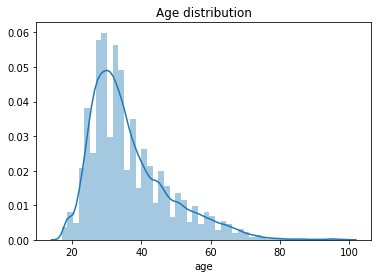

In [54]:
pandasFrame = df.select("age").toPandas()
sns.distplot(pandasFrame.age).set_title('Age distribution')

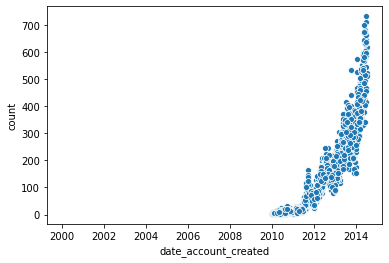

In [55]:
ax = sns.scatterplot(x="date_account_created", y="count", data=accountsCreated)

In [61]:

pandasFrame = df.select('avg(secs_elapsed)')


AnalysisException: "cannot resolve '`avg(secs_elapsed)`' given input columns: [signup_method, date_first_booking, country_destination, signup_flow, first_browser, signup_app, date_account_created, language, first_device_type, first_affiliate_tracked, timestamp_first_active, age, gender, affiliate_channel, id, affiliate_provider];;\n'Project ['avg(secs_elapsed)]\n+- Filter ((age#99 > cast(16 as double)) && (age#99 < cast(100 as double)))\n   +- Union\n      :- Relation[id#94,date_account_created#95,timestamp_first_active#96L,date_first_booking#97,gender#98,age#99,signup_method#100,signup_flow#101,language#102,affiliate_channel#103,affiliate_provider#104,first_affiliate_tracked#105,signup_app#106,first_device_type#107,first_browser#108,country_destination#109] csv\n      +- Relation[id#52,date_account_created#53,timestamp_first_active#54L,date_first_booking#55,gender#56,age#57,signup_method#58,signup_flow#59,language#60,affiliate_channel#61,affiliate_provider#62,first_affiliate_tracked#63,signup_app#64,first_device_type#65,first_browser#66,country_destination#67] csv\n"

In [62]:
pandasFrame = left_join.toPandas()

Text(0.5, 1.0, 'Average session time distribution')

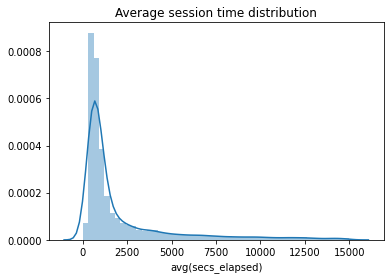

In [63]:
sns.distplot(pandasFrame['avg(secs_elapsed)'][pandasFrame['avg(secs_elapsed)']<15000]).set_title('Average session time distribution')

Text(0.5, 1.0, 'Average number of sessions per user')

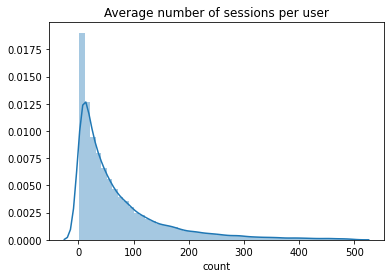

In [64]:
sns.distplot(pandasFrame['count'][pandasFrame['count']<500]).set_title('Average number of sessions per user')